In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
import sklearn.metrics as metrics

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 1. EDA

In [4]:
train = pd.read_csv('./pima.csv')

In [5]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 독립변수, 종속변수 정리

- Feature(X, 독립 변수)

    1. Pregnancies - Number of times pregnant
    1. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    1. BloodPressure
    1. Skin_Thickness - Triceps skin fold thickness (mm)
    1. Insulin - 2-Hour serum insulin (mu U/ml)
    1. BMI - Body mass index (weight in kg/(height in m)^2)
    1. DiabetesPedigreeFunction - Diabetes pedigree function
    1. Age
    

- Target

    1. Outcome = 당뇨병 여부 ( 0 = 정상, 1 = 당뇨 )

In [6]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 2. 변수별 시각화

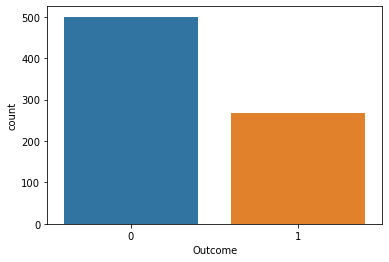

In [8]:
sns.countplot(x = 'Outcome', data = train)

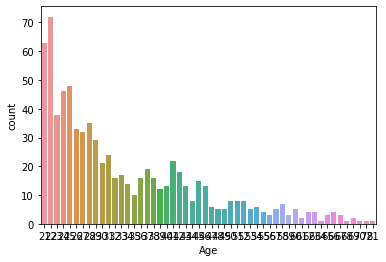

In [9]:
sns.countplot(x = 'Age', data = train)

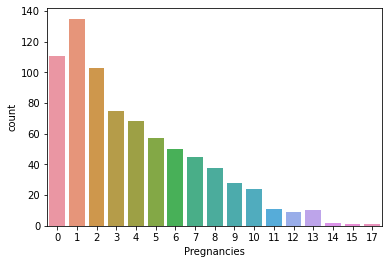

In [10]:
sns.countplot(x = 'Pregnancies', data = train)

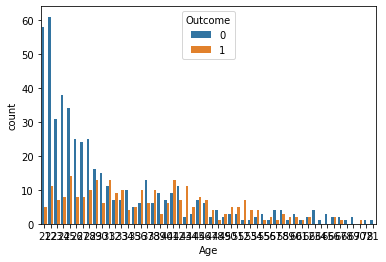

In [11]:
sns.countplot(x ='Age', hue = 'Outcome', data = train)

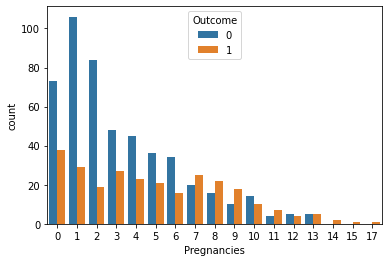

In [12]:
sns.countplot(x ='Pregnancies', hue = 'Outcome', data = train)



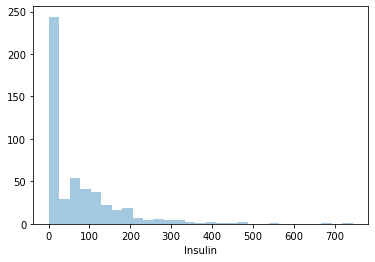

In [13]:
sns.distplot(train.Insulin.loc[train['Outcome'] == 0], kde = False)

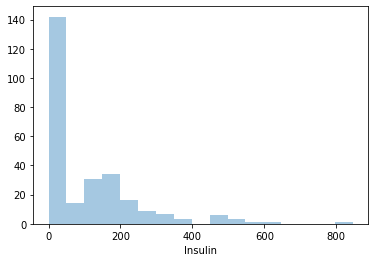

In [14]:
sns.distplot(train.Insulin.loc[train['Outcome'] == 1], kde = False)

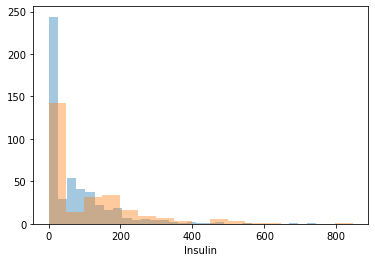

In [15]:
sns.distplot(train.Insulin.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.Insulin.loc[train['Outcome'] == 1], kde = False)

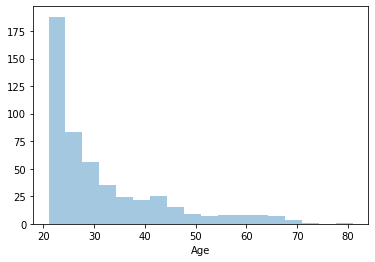

In [16]:
sns.distplot(train.Age.loc[train['Outcome'] == 0], kde = False)

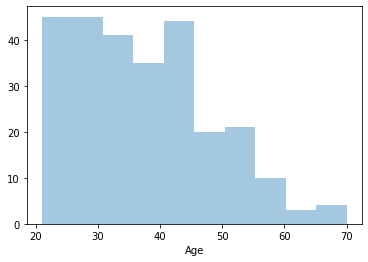

In [17]:
sns.distplot(train.Age.loc[train['Outcome'] == 1], kde = False)

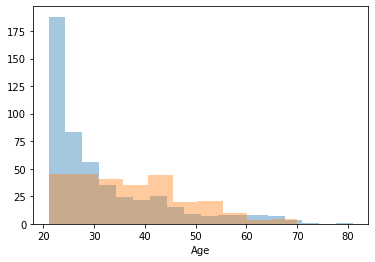

In [18]:
sns.distplot(train.Age.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.Age.loc[train['Outcome'] == 1], kde = False)

# 빨간색이 당뇨병 환자.

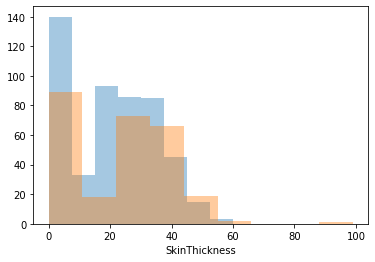

In [19]:
sns.distplot(train.SkinThickness.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.SkinThickness.loc[train['Outcome'] == 1], kde = False)


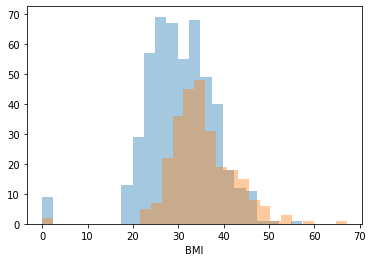

In [20]:
sns.distplot(train.BMI.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.BMI.loc[train['Outcome'] == 1], kde = False)

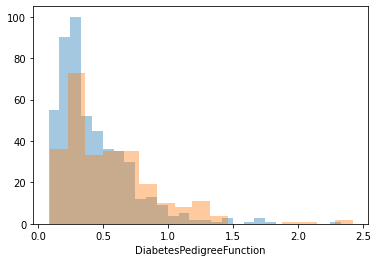

In [21]:
sns.distplot(train.DiabetesPedigreeFunction.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.DiabetesPedigreeFunction.loc[train['Outcome'] == 1], kde = False)

# 빨간색이 당뇨병 환자.

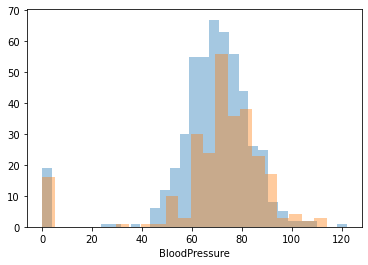

In [22]:
sns.distplot(train.BloodPressure.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.BloodPressure.loc[train['Outcome'] == 1], kde = False)

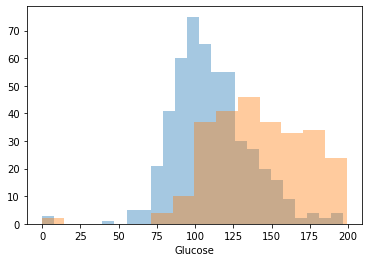

In [23]:
sns.distplot(train.Glucose.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.Glucose.loc[train['Outcome'] == 1], kde = False)

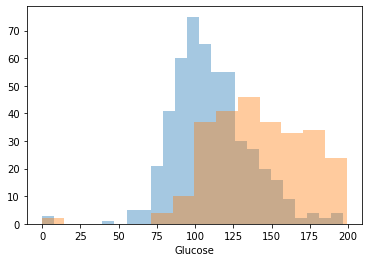

In [24]:
sns.distplot(train.Glucose.loc[train['Outcome'] == 0], kde = False)
sns.distplot(train.Glucose.loc[train['Outcome'] == 1], kde = False)

## 2-1. 각 변수별 0 값에 대한 고찰

- 혈압, 인슐린, BMI, 글루코스가 값이 0인 데이터가 존재.
- 0값을 결측치로 바꾸고 적절한 대체값 넣기 필요

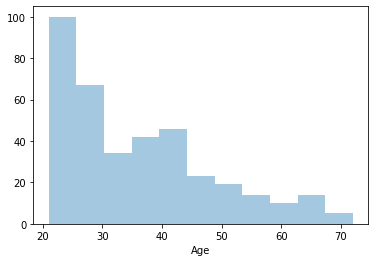

In [25]:
# 인슐린이 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['Insulin'] == 0], kde = False)

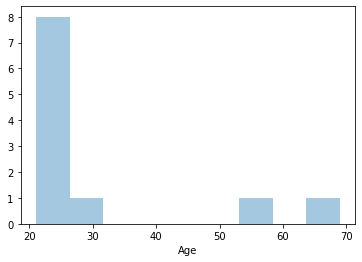

In [26]:
# BMI가 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['BMI'] == 0], kde = False)

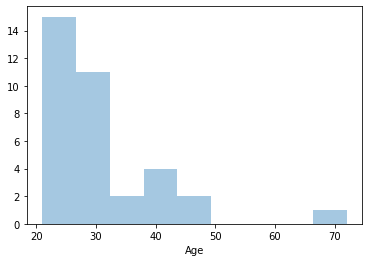

In [27]:
# 혈압이 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['BloodPressure'] == 0], kde = False)

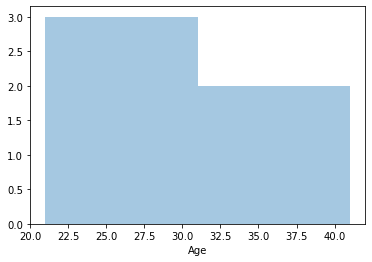

In [28]:
# 글루코스가 0인 데이터의 나이분포

sns.distplot(train.Age.loc[train['Glucose'] == 0], kde = False)

In [29]:
# 0 값을 NAN 처리하여 적절한 수치대입이 필요.

train[['Insulin','BloodPressure', 'BMI', 'Glucose']].astype(str).replace('0', np.nan)
cols = ['BloodPressure', 'BMI', 'Glucose','Insulin']
train[cols] = train[cols].replace(['0', 0], np.nan)

In [30]:
# 인슐린의 0값의 갯수가 374로 상당히 많아 데이터전환 필요.

train[['Insulin', 'BloodPressure', 'BMI', 'Glucose']].isna().sum()

Insulin          374
BloodPressure     35
BMI               11
Glucose            5
dtype: int64

In [31]:
#나이 카테고리

train['Age_range'] = train.Age.apply(lambda x: '20s'
                                    if x < 30
                                    else ('30s' if x <40
                                    else ('40s' if x <50
                                    else '50s and more')))

# 결측치를 나이대 평균값으로 채워주기

train['BloodPressure'].fillna(train.groupby(['Age_range'])['BloodPressure'].transform('mean'), inplace=True)
train['BMI'].fillna(train.groupby(['Age_range'])['BloodPressure'].transform('mean'), inplace=True)
train['Glucose'].fillna(train.groupby(['Age_range'])['BloodPressure'].transform('mean'), inplace=True)

In [32]:
# Insulin 결측치를 Glucose 평균값으로 넣어보기

train[['Insulin']].astype(str).replace('0', np.nan)
cols = ['Insulin']
train[cols] = train[cols].replace(['0', 0], np.nan)

train['Glucose_range'] = train.Glucose.apply(lambda x: 'normal'
                                    if x <= 140
                                    else ('high' if x <= 199
                                    else 'too high'))

train['Insulin'].fillna(train.groupby(['Glucose_range'])['Insulin'].transform('mean'), inplace=True)

In [33]:
train.drop(['Age_range', 'Glucose_range'], axis = 1, inplace = True)

In [34]:
train['Insulin'].astype(int)

0      248
1      121
2      248
3       94
4      168
      ... 
763    180
764    121
765    112
766    121
767    121
Name: Insulin, Length: 768, dtype: int32

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [36]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,248.466667,33.6,0.627,50,1
1,1,85.0,66.0,29,121.788927,26.6,0.351,31,0
2,8,183.0,64.0,0,248.466667,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1


# 3. 모델링

In [37]:
y = train['Outcome']
y.shape

(768,)

In [38]:
X = train.drop('Outcome', axis=1)
X.shape

(768, 8)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify = y)

In [40]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(614, 8), 테스트 세트 Shape:(154, 8)
 학습 세트 레이블 값 분포 비율
0    0.651466
1    0.348534
Name: Outcome, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.649351
1    0.350649
Name: Outcome, dtype: float64


## 3-1. Accuracy 확인

In [41]:
# logistic

log_cl =  LogisticRegression(n_jobs = -1)
log_cl.fit(X_train, y_train)
log_cl_pred = log_cl.predict(X_test)
print('Accuracy for rbf logistic is ', metrics.accuracy_score(log_cl_pred, y_test))

log_cl_cv = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs=-1)
print('The cross validated score for logistic is:', log_cl_cv.mean())

Accuracy for rbf logistic is  0.8051948051948052
The cross validated score for logistic is: 0.752221047065045


In [42]:
# Random forest

rf_cl = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
rf_cl.fit(X_train, y_train)
rf_cl_pred = rf_cl.predict(X_test)
print('The accuracy of the Random Forests is', metrics.accuracy_score(rf_cl_pred, y_test))

rf_cl_cv = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs=-1)
print('The cross validated score for Random forest is:', rf_cl_cv.mean())

The accuracy of the Random Forests is 0.7987012987012987
The cross validated score for Random forest is: 0.7409307244843998


In [43]:
# Bagged KNN

ba_knn_model=BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=4), n_estimators=200, n_jobs=-1)
ba_knn_model.fit(X_train, y_train)
ba_knn_model_pred = ba_knn_model.predict(X_test)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(ba_knn_model_pred, y_test))

ba_knn_model_cv = cross_val_score(ba_knn_model, X_train, y_train, cv=10, scoring = 'accuracy', n_jobs=-1)
print('The cross validated score for Bagged KNN is:', ba_knn_model_cv.mean())

The accuracy for bagged KNN is: 0.6883116883116883
The cross validated score for Bagged KNN is: 0.7102326811210998


In [44]:
# Bagged DecisionTree

ba_dt_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100, n_jobs=-1)
ba_dt_model.fit(X_train, y_train)
ba_dt_model_pred = ba_dt_model.predict(X_test)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(ba_dt_model_pred, y_test))

ba_dt_model_cv = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs=-1)
print('The cross validated score for bagged Decision Tree is:', ba_dt_model_cv.mean())

The accuracy for bagged Decision Tree is: 0.8051948051948052
The cross validated score for bagged Decision Tree is: 0.7475409836065574


In [45]:
# AdaBoost (Adaptive boosting)

ada_cl = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1)
ada_cl.fit(X_train, y_train)
ada_cl_pred = ada_cl.predict(X_test)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(ada_cl_pred, y_test))

ada_cl_cv = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs = -1)
print('The cross validated score for AdaBoost is:', ada_cl_cv.mean())

The accuracy for bagged Decision Tree is: 0.8116883116883117
The cross validated score for AdaBoost is: 0.7392913802221047


In [46]:
# Gradient Boost

gr_grad = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1)
gr_grad.fit(X_train, y_train)
gr_grad_pred = gr_grad.predict(X_test)
print('The accuracy for Gradient Boost is:', metrics.accuracy_score(gr_grad_pred, y_test))

gr_grad_cv = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs = -1)
print('The cross validated score for Gradient Boosting is:', gr_grad_cv.mean())

The accuracy for Gradient Boost is: 0.8246753246753247
The cross validated score for Gradient Boosting is: 0.7394500264410365


In [47]:
# XGBoost

xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.1)
xgb_model.fit(X_train,y_train)
xgb_model_pred = xgb_model.predict(X_test)
print('The accuracy of the XGBoost is', metrics.accuracy_score(xgb_model_pred, y_test))

xgb_model_cv = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs = -1)
print('The cross validated score for XGBoost is:', xgb_model_cv.mean())

The accuracy of the XGBoost is 0.7922077922077922
The cross validated score for XGBoost is: 0.7296404019037547


In [48]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)
print('The accuracy of the Light GBM is', metrics.accuracy_score(lgbm_clf_pred, y_test))

lgbm_clf_cv = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'accuracy', n_jobs = -1)
print('The cross validated score for Light GBM is:', lgbm_clf_cv.mean())

The accuracy of the Light GBM is 0.7467532467532467
The cross validated score for Light GBM is: 0.7328926493918562


In [49]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged KNN', 'Bagged DecisionTree', 'Adaptive Boost', 
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'Accuracy': [metrics.accuracy_score(log_cl_pred, y_test),  
                 metrics.accuracy_score(rf_cl_pred, y_test), metrics.accuracy_score(ba_knn_model_pred, y_test),
                 metrics.accuracy_score(ba_dt_model_pred, y_test), metrics.accuracy_score(ada_cl_pred, y_test),
                 metrics.accuracy_score(gr_grad_pred, y_test), metrics.accuracy_score(xgb_model_pred, y_test),
                 metrics.accuracy_score(lgbm_clf_pred, y_test)],
    'CV_Mean': [log_cl_cv.mean(), rf_cl_cv.mean(), ba_knn_model_cv.mean(),
                ba_dt_model_cv.mean(), ada_cl_cv.mean(), gr_grad_cv.mean(), 
                xgb_model_cv.mean(), lgbm_clf_cv.mean()],
    'CV_std':[log_cl_cv.std(), rf_cl_cv.std(), ba_knn_model_cv.std(),
                ba_dt_model_cv.std(), ada_cl_cv.std(), gr_grad_cv.std(), 
                xgb_model_cv.std(), lgbm_clf_cv.std()]
})

result = results.sort_values(by='CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,Accuracy,CV_Mean,CV_std
Model,,,
Logistic Classifier,0.805195,0.752221,0.062748
Bagged DecisionTree,0.805195,0.747541,0.054460
Random forest,0.798701,0.740931,0.052508
Gradient Boost,0.824675,0.739450,0.089625
Adaptive Boost,0.811688,0.739291,0.064255
Light GBM,0.746753,0.732893,0.057216
XGBoost,0.792208,0.729640,0.077505
Bagged KNN,0.688312,0.710233,0.044367


## 3-2. F1-Score 확인

In [50]:
# logistic

log_cl =  LogisticRegression(n_jobs = -1)
log_cl.fit(X_train, y_train)
log_cl_pred = log_cl.predict(X_test)

log_cl_cv_pre = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
log_cl_cv_rec = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
log_cl_cv_f1 = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for rbf logistic is ', metrics.precision_score(log_cl_pred, y_test))
print('Recall for rbf logistic is ', metrics.recall_score(log_cl_pred, y_test))
print('F1_score for rbf logistic is ', metrics.f1_score(log_cl_pred, y_test))
print()
print('The cross validated precision for logistic is:', log_cl_cv_pre.mean())
print('The cross validated recall for logistic is:', log_cl_cv_rec.mean())
print('The cross validated f1_score for logistic is:', log_cl_cv_f1.mean())

Precision for rbf logistic is  0.5925925925925926
Recall for rbf logistic is  0.8
F1_score for rbf logistic is  0.6808510638297872

The cross validated precision for logistic is: 0.6912175585777349
The cross validated recall for logistic is: 0.5354978354978355
The cross validated f1_score for logistic is: 0.5978811489920036


In [51]:
# Random forest

rf_cl = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
rf_cl.fit(X_train, y_train)
rf_cl_pred = rf_cl.predict(X_test)

rf_cl_cv_pre = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
rf_cl_cv_rec = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
rf_cl_cv_f1 = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for random forest is ', metrics.precision_score(rf_cl_pred, y_test))
print('Recall for random forest is ', metrics.recall_score(rf_cl_pred, y_test))
print('F1_score for random forest is ', metrics.f1_score(rf_cl_pred, y_test))
print()
print('The cross validated precision for random forest is:', rf_cl_cv_pre.mean())
print('The cross validated recall for random forest is:', rf_cl_cv_rec.mean())
print('The cross validated f1_score for random forest is:', rf_cl_cv_f1.mean())

Precision for random forest is  0.6296296296296297
Recall for random forest is  0.723404255319149
F1_score for random forest is  0.6732673267326733

The cross validated precision for random forest is: 0.6483008658008658
The cross validated recall for random forest is: 0.5653679653679653
The cross validated f1_score for random forest is: 0.6037116759209782


In [52]:
# KNN 군집분석

knn_model=KNeighborsClassifier() 
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

knn_model_cv_pre = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
knn_model_cv_rec = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
knn_model_cv_f1 = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for KNN is ', metrics.precision_score(knn_model_pred, y_test))
print('Recall for KNN is ', metrics.recall_score(knn_model_pred, y_test))
print('F1_score for KNN is ', metrics.f1_score(knn_model_pred, y_test))
print()
print('The cross validated precison for KNN is:', knn_model_cv_pre.mean())
print('The cross validated recall for KNN is:', knn_model_cv_rec.mean())
print('The cross validated f1_score for KNN is:', knn_model_cv_f1.mean())

Precision for KNN is  0.5740740740740741
Recall for KNN is  0.62
F1_score for KNN is  0.5961538461538461

The cross validated precison for KNN is: 0.6912175585777349
The cross validated recall for KNN is: 0.5354978354978355
The cross validated f1_score for KNN is: 0.5978811489920036


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


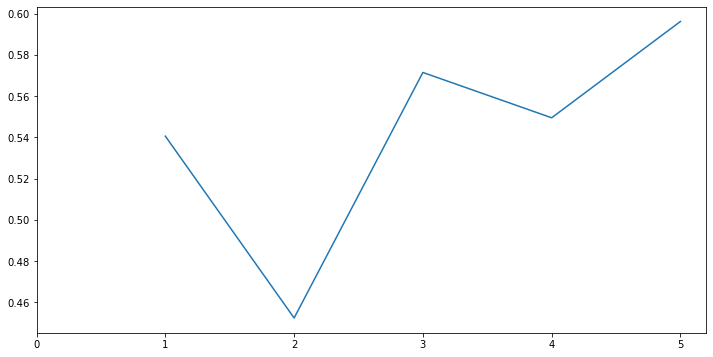

Accuracies for different values of n are: [0.54054054 0.45238095 0.57142857 0.54945055 0.59615385] with the max value as  0.5961538461538461


In [53]:
# KNN 하이퍼파라미터에 따른 F1_Score 차이 보기

a_index = list(range(1,6))
a = pd.Series()
x = [0,1,2,3,4,5]
for i in list(range(1,6)):
    knn_model = KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train, y_train)
    knn_model_pred = knn_model.predict(X_test)
    a=a.append(pd.Series(metrics.f1_score(knn_model_pred, y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [54]:
# Bagged DecisionTree

ba_dt_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100, n_jobs=-1)
ba_dt_model.fit(X_train, y_train)
ba_dt_model_pred = ba_dt_model.predict(X_test)

ba_dt_model_cv_pre = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
ba_dt_model_cv_rec = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
ba_dt_model_cv_f1 = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Bagged DecisionTree is ', metrics.precision_score(ba_dt_model_pred, y_test))
print('Recall for Bagged DecisionTree is ', metrics.recall_score(ba_dt_model_pred, y_test))
print('F1_score for Bagged DecisionTree is ', metrics.f1_score(ba_dt_model_pred, y_test))
print()
print('The cross validated precision for Bagged DecisionTree is:', ba_dt_model_cv_pre.mean())
print('The cross validated recall for Bagged DecisionTree is:', ba_dt_model_cv_rec.mean())
print('The cross validated f1_score for Bagged DecisionTree is:', ba_dt_model_cv_f1.mean())

Precision for Bagged DecisionTree is  0.6481481481481481
Recall for Bagged DecisionTree is  0.7608695652173914
F1_score for Bagged DecisionTree is  0.7000000000000001

The cross validated precision for Bagged DecisionTree is: 0.6558692776627559
The cross validated recall for Bagged DecisionTree is: 0.6116883116883116
The cross validated f1_score for Bagged DecisionTree is: 0.6281369954302285


In [55]:
# AdaBoost (Adaptive boosting)

ada_cl = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1)
ada_cl.fit(X_train, y_train)
ada_cl_pred = ada_cl.predict(X_test)

ada_cl_cv_pre = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
ada_cl_cv_rec = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
ada_cl_cv_f1 = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for AdaBoost is ', metrics.precision_score(ada_cl_pred, y_test))
print('Recall for rbf AdaBoost is ', metrics.recall_score(ada_cl_pred, y_test))
print('F1_score for rbf AdaBoost is ', metrics.f1_score(ada_cl_pred, y_test))
print()
print('The cross validated precision for AdaBoost is:', ada_cl_cv_pre.mean())
print('The cross validated recall for AdaBoost is:', ada_cl_cv_rec.mean())
print('The cross validated f1_score for AdaBoost is:', ada_cl_cv_f1.mean())

Precision for AdaBoost is  0.6481481481481481
Recall for rbf AdaBoost is  0.7777777777777778
F1_score for rbf AdaBoost is  0.707070707070707

The cross validated precision for AdaBoost is: 0.6602020202020202
The cross validated recall for AdaBoost is: 0.5365800865800866
The cross validated f1_score for AdaBoost is: 0.5882395930070349


In [56]:
# Gradient Boost

gr_grad = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1)
gr_grad.fit(X_train, y_train)
gr_grad_pred = gr_grad.predict(X_test)

gr_grad_cv_pre = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
gr_grad_cv_rec = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
gr_grad_cv_f1 = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Gradient Boost is ', metrics.precision_score(gr_grad_pred, y_test))
print('Recall for Gradient Boost is ', metrics.recall_score(gr_grad_pred, y_test))
print('F1_score for Gradient Boost is ', metrics.f1_score(gr_grad_pred, y_test))
print()
print('The cross validated precision for Gradient Boost is:', gr_grad_cv_pre.mean())
print('The cross validated recall for Gradient Boost is:', gr_grad_cv_rec.mean())
print('The cross validated f1_score for Gradient Boost is:', gr_grad_cv_f1.mean())

Precision for Gradient Boost is  0.7037037037037037
Recall for Gradient Boost is  0.76
F1_score for Gradient Boost is  0.7307692307692308

The cross validated precision for Gradient Boost is: 0.6554436445197316
The cross validated recall for Gradient Boost is: 0.5982683982683983
The cross validated f1_score for Gradient Boost is: 0.6166602542307638


In [57]:
# XGBoost

xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.1)
xgb_model.fit(X_train,y_train)
xgb_model_pred = xgb_model.predict(X_test)

xgb_model_cv_pre = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
xgb_model_cv_rec = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
xgb_model_cv_f1 = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for XGBoost is ', metrics.precision_score(xgb_model_pred, y_test))
print('Recall for XGBoost is ', metrics.recall_score(xgb_model_pred, y_test))
print('F1_score for XGBoost is ', metrics.f1_score(xgb_model_pred, y_test))
print()
print('The cross validated prediction for XGBoost is:', xgb_model_cv_pre.mean())
print('The cross validated recall for XGBoost is:', xgb_model_cv_rec.mean())
print('The cross validated f1_score for XGBoost is:', xgb_model_cv_f1.mean())

Precision for XGBoost is  0.6666666666666666
Recall for XGBoost is  0.72
F1_score for XGBoost is  0.6923076923076923

The cross validated prediction for XGBoost is: 0.6268451657038614
The cross validated recall for XGBoost is: 0.6123376623376624
The cross validated f1_score for XGBoost is: 0.6147997073932363


In [58]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.5925925925925926
Recall for Light GBM is  0.6530612244897959
F1_score for Light GBM is  0.6213592233009709

The cross validated precision for Light GBM is: 0.6303625424744015
The cross validated recall for Light GBM is: 0.6028138528138529
The cross validated f1_score for Light GBM is: 0.6105934691042609


In [59]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_rec.std(), rf_cl_cv_rec.std(),
                ba_dt_model_cv_rec.std(), ada_cl_cv_rec.std(), knn_model_cv_rec.std(),gr_grad_cv_rec.std(), 
                xgb_model_cv_rec.std(), lgbm_clf_cv_rec.std()]    
})

In [60]:
result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
Bagged DecisionTree,0.700000,0.648148,0.760870,0.628137,0.079106,0.655869,0.109978,0.611688,0.089962
Gradient Boost,0.730769,0.703704,0.760000,0.616660,0.115613,0.655444,0.155930,0.598268,0.106176
XGBoost,0.692308,0.666667,0.720000,0.614800,0.100830,0.626845,0.136827,0.612338,0.094925
Light GBM,0.621359,0.592593,0.653061,0.610593,0.080677,0.630363,0.105046,0.602814,0.102004
Random forest,0.673267,0.629630,0.723404,0.603712,0.079288,0.648301,0.110817,0.565368,0.071184
Logistic Classifier,0.680851,0.592593,0.800000,0.597881,0.112541,0.691218,0.137306,0.535498,0.119111
knn_model,0.596154,0.574074,0.620000,0.597881,0.112541,0.691218,0.137306,0.535498,0.119111
Adaptive Boost,0.707071,0.648148,0.777778,0.588240,0.103265,0.660202,0.123665,0.536580,0.103528


# 4. 임계절 조절과 하이퍼파라미터 튜닝

## 4-1. GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트를 위한 조합 할당.

params = {'num_leaves': [8 ,16 ,32, 64],
          'max_depth':[16, 32, 64, 128, 160],
          'min_child_samples':[20, 60, 100],
          'subsample':[0.2, 0.4, 0.6, 0.8, 1],
         'n_estimators':[100,300,500,700,900,1200]}



gridcv = GridSearchCV(lgbm_clf, param_grid=params, n_jobs=-1, cv=3)

In [69]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

[1]	training's binary_logloss: 0.618491	valid_1's binary_logloss: 0.621488
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.595489	valid_1's binary_logloss: 0.595965
[3]	training's binary_logloss: 0.575982	valid_1's binary_logloss: 0.580517
[4]	training's binary_logloss: 0.558028	valid_1's binary_logloss: 0.561216
[5]	training's binary_logloss: 0.543761	valid_1's binary_logloss: 0.551354
[6]	training's binary_logloss: 0.529166	valid_1's binary_logloss: 0.535423
[7]	training's binary_logloss: 0.51577	valid_1's binary_logloss: 0.521745
[8]	training's binary_logloss: 0.503288	valid_1's binary_logloss: 0.509564
[9]	training's binary_logloss: 0.49475	valid_1's binary_logloss: 0.500694
[10]	training's binary_logloss: 0.485345	valid_1's binary_logloss: 0.492579
[11]	training's binary_logloss: 0.475508	valid_1's binary_logloss: 0.485287
[12]	training's binary_logloss: 0.468191	valid_1's binary_logloss: 0.478978
[13]	training's binary_logloss: 0.4620

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [16, 32, 64, 128, 160],
                         'min_child_samples': [20, 60, 100],
                         'n_estimators': [100, 300, 500, 700, 900, 1200],
                         'num_leaves': [8, 16, 32, 64],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1]})

In [70]:
gridcv.best_estimator_

LGBMClassifier(max_depth=16, min_child_samples=60, num_leaves=8, subsample=0.2)

In [107]:
lgbm_clf_best = LGBMClassifier(max_depth=16, min_child_samples=60, num_leaves=8, subsample=0.2)

In [108]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=16, min_child_samples=60, num_leaves=8, subsample=0.2)

In [109]:
# 적절한 임계점 찾기

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (154, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.98548119 0.01451881]
 [0.10287799 0.89712201]
 [0.76425049 0.23574951]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.98548119 0.01451881 0.98548119 0.01451881]
 [0.10287799 0.89712201 0.10287799 0.89712201]
 [0.76425049 0.23574951 0.76425049 0.23574951]]


In [110]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[87 13]
 [19 35]]
정확도: 0.7922, 정밀도: 0.7292, 재현율: 0.6481, F1_score:  0.648148


In [111]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1]

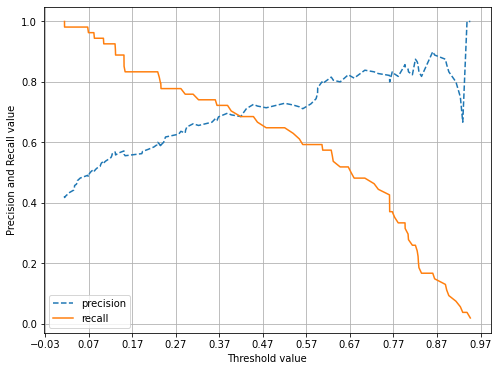

In [112]:
# 임계점 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [113]:
# 가장 높은 F1_score를 가지는 임계점 찾기

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.369, 0.7091)

In [114]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.369
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[83 17]
 [15 39]]
정확도: 0.7922, 정밀도: 0.6964, 재현율: 0.7222, F1_score:  0.722222


## 4-2. Randomized Grid SearchCV

In [115]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [1,2,3,4,5,6,7,8,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [80]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.5s


LGBMClassifier(bootstrap=False, max_depth=10, max_features='auto',
               min_samples_leaf=8, min_samples_split=4)


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.5s finished


In [116]:
lg_random.best_estimator_

LGBMClassifier(bootstrap=False, max_depth=10, max_features='auto',
               min_samples_leaf=8, min_samples_split=4)

In [81]:
lgb_random_best = LGBMClassifier(bootstrap=False, max_depth=10, max_features='auto',
               min_samples_leaf=8, min_samples_split=4)

In [82]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=False, max_depth=10, max_features='auto',
               min_samples_leaf=3, min_samples_split=4)

In [83]:
# 적절한 임계값 찾기

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (154, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[9.99818125e-01 1.81875068e-04]
 [1.68167556e-02 9.83183244e-01]
 [9.07783530e-01 9.22164697e-02]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[9.99818125e-01 1.81875068e-04 9.99818125e-01 1.81875068e-04]
 [1.68167556e-02 9.83183244e-01 1.68167556e-02 9.83183244e-01]
 [9.07783530e-01 9.22164697e-02 9.07783530e-01 9.22164697e-02]]


In [84]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[88 12]
 [21 33]]
정확도: 0.7857, 정밀도: 0.7333, 재현율: 0.6111, F1_score:  0.611111


In [85]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1]

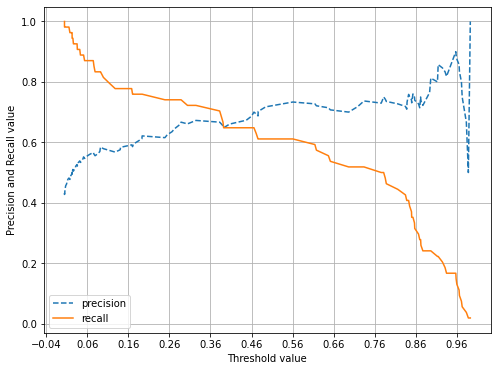

In [86]:
# 임계점 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [87]:
# F1_score가 최대인 임계값 찾기

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.283, 0.7018)

In [117]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.283
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[76 24]
 [13 41]]
정확도: 0.7597, 정밀도: 0.6308, 재현율: 0.7593, F1_score:  0.759259


## 4-3. BaysianOptimization

In [89]:
bayes_params = {
    'num_leaves': (8, 60),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 24),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [90]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [91]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [92]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 30, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 18, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.80463	valid_0's binary_logloss: 0.588141
best_iter: 22
roc_auc: 0.8046296296296296
|  1        |  0.8046   |  0.7744   |  18.3     |  32.12    |  0.05494  |  30.03    |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 38, 'colsample_bytree': 0.9818313802505146,

params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 60, 'colsample_bytree': 1.0, 'subsample': 0.5, 'max_depth': 4, 'reg_alpha': 0.0, 'reg_lambda': 0.5, 'min_split_gain': 0.1, 'min_child_weight': 18.44180096443114, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.855833	valid_0's binary_logloss: 0.462292
Did not meet early stopping. Best iteration is:
[80]	valid_0's auc: 0.857315	valid_0's binary_logloss: 0.474211
best_iter: 80
roc_auc: 0.8573148148148148
|  12       |  0.8573   |  1.0      |  4.0      |  18.44    |  0.1      |  60.0     |  0.0      |  0.5      |  0.5      |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 23, 'colsample_bytree': 1.0, 'subsample': 0.5, 'max_depth': 24, 'reg_alpha': 0.0, 'reg_lambda': 0.5, 'min_split_gain': 0.1, 'min_child_weight': 5.0, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.883

In [93]:
BO_lgb.max

{'target': 0.8836111111111111,
 'params': {'colsample_bytree': 1.0,
  'max_depth': 24.0,
  'min_child_weight': 5.0,
  'min_split_gain': 0.1,
  'num_leaves': 23.41937348050846,
  'reg_alpha': 0.0,
  'reg_lambda': 0.5,
  'subsample': 0.5}}

In [94]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.85463	valid_0's binary_logloss: 0.640167
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.858333	valid_0's binary_logloss: 0.632729
[3]	valid_0's auc: 0.861019	valid_0's binary_logloss: 0.625506
[4]	valid_0's auc: 0.871481	valid_0's binary_logloss: 0.618202
[5]	valid_0's auc: 0.870648	valid_0's binary_logloss: 0.611627
[6]	valid_0's auc: 0.871204	valid_0's binary_logloss: 0.605466
[7]	valid_0's auc: 0.876759	valid_0's binary_logloss: 0.598954
[8]	valid_0's auc: 0.875278	valid_0's binary_logloss: 0.593264
[9]	valid_0's auc: 0.876944	valid_0's binary_logloss: 0.587621
[10]	valid_0's auc: 0.876667	valid_0's binary_logloss: 0.58272
[11]	valid_0's auc: 0.876667	valid_0's binary_logloss: 0.577872
[12]	valid_0's auc: 0.881944	valid_0's binary_logloss: 0.573264
[13]	valid_0's auc: 0.883611	valid_0's binary_logloss: 0.568677
[14]	valid_0's auc: 0.883056	valid_0's binary_logloss: 0.564156
[15]	valid_0's auc: 0.88287	valid_0's binary_logloss:

In [95]:
lgbm_clf_bayes_best

LGBMClassifier(learning_rate=0.02, max_depth=24, min_child_weight=5.0,
               min_split_gain=0.1, n_estimators=1000, num_leaves=23,
               reg_lambda=0.5, subsample=0.5)

In [96]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.02, max_depth=24, min_child_weight=5.0,
               min_split_gain=0.1, n_estimators=1000, num_leaves=23,
               reg_lambda=0.5, subsample=0.5)

In [97]:
# 최적의 임계값 찾기

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (154, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.98358001 0.01641999]
 [0.03116375 0.96883625]
 [0.73243093 0.26756907]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.98358001 0.01641999 0.99848624 0.00151376]
 [0.03116375 0.96883625 0.13934787 0.86065213]
 [0.73243093 0.26756907 0.67320266 0.32679734]]


In [98]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1_score:  0.648148


In [99]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###

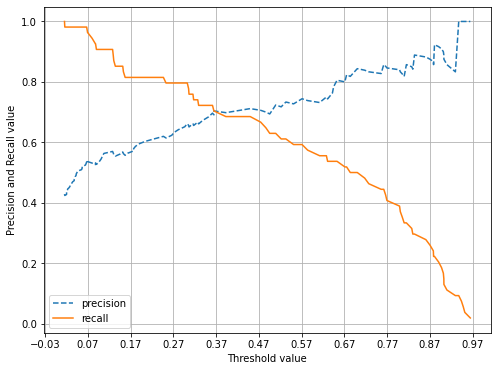

In [100]:
# 임계값 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [101]:
# F1_score가 최대인 임계값 찾기

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.443, 0.7115)

In [118]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.443
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[86 14]
 [17 37]]
정확도: 0.7987, 정밀도: 0.7255, 재현율: 0.6852, F1_score:  0.685185
